# Exercise 1: directed and switching graphs

In [1]:
# header to start
# matplotlib notebook
import numpy as np

import matplotlib.pyplot as plt

import scipy.linalg

import pickle

import random

You are given four examples of sets of four **directed** graphs:
* In the first example, contained in the directory Exercise1_Graph10a, all the graphs contain 10 vertices
* In the second example, contained in the directory Exercise1_Graph10b, all the graphs contain 10 vertices
* In the third example, contained in the directory Exercise1_Graph100a, all the graphs contain 100 vertices
* In the last example, contained in the directory Exercise1_Graph100b, all the graphs contain 100 vertices

The following code can be used to load each graph and compute its Laplacian.

In [2]:
# to load the list of edges from file, you can do the following
with open('Exercise1_Graph10a/graph1.pickle', 'rb') as f:
    E10a_1 = pickle.load(f)

with open('Exercise1_Graph10a/graph2.pickle', 'rb') as f:
    E10a_2 = pickle.load(f)

with open('Exercise1_Graph10a/graph3.pickle', 'rb') as f:
    E10a_3 = pickle.load(f)
    
with open('Exercise1_Graph10a/graph4.pickle', 'rb') as f:
    E10a_4 = pickle.load(f)

with open('Exercise1_Graph10b/graph1.pickle', 'rb') as f:
    E10b_1 = pickle.load(f)

with open('Exercise1_Graph10b/graph2.pickle', 'rb') as f:
    E10b_2 = pickle.load(f)

with open('Exercise1_Graph10b/graph3.pickle', 'rb') as f:
    E10b_3 = pickle.load(f)
    
with open('Exercise1_Graph10b/graph4.pickle', 'rb') as f:
    E10b_4 = pickle.load(f)
    
with open('Exercise1_Graph100a/graph1.pickle', 'rb') as f:
    E100a_1 = pickle.load(f)

with open('Exercise1_Graph100a/graph2.pickle', 'rb') as f:
    E100a_2 = pickle.load(f)

with open('Exercise1_Graph100a/graph3.pickle', 'rb') as f:
    E100a_3 = pickle.load(f)
    
with open('Exercise1_Graph100a/graph4.pickle', 'rb') as f:
    E100a_4 = pickle.load(f)
    
with open('Exercise1_Graph100b/graph1.pickle', 'rb') as f:
    E100b_1 = pickle.load(f)

with open('Exercise1_Graph100b/graph2.pickle', 'rb') as f:
    E100b_2 = pickle.load(f)

with open('Exercise1_Graph100b/graph3.pickle', 'rb') as f:
    E100b_3 = pickle.load(f)
    
with open('Exercise1_Graph100b/graph4.pickle', 'rb') as f:
    E100b_4 = pickle.load(f)
    
    
    
# note that it is possible to find the eigenvalues of a function using the function
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html
# np.linalg.eigvals()

# it is possible to sort an array of numbers using
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html
# np.sort()

# it is possible to find the exponential of a matrix using
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html#scipy.linalg.expm
# scipy.linalg.expm()

In [3]:
# the laplacian can then be found using
# L = getLaplacian(E, 10, directed=True)

#computing Laplacian matrix for a given graph
#input: edges: list of edges; n_vertices: number of vertices; directed: true for directed and false for undirected
#return: the corresponding Laplacian
def getlaplacian(edges, n_vertices,directed=True):
    #pre-allocation for adjacency matrix
    Adja=np.zeros((n_vertices,n_vertices),dtype=int)
    for e in edges:
        Adja[e[1],e[0]]=1;
    if directed==False : #undirected graph
        #computing the transpose 
        Adja_trans=np.transpose(Adja)
        Adja=Adja+Adja_trans  
    #For both directed and undirected, sum of columns gives degrees
    d=np.sum(Adja,axis=1)
    D=np.diag(d)
    #compute Laplacian
    L=D-Adja
    return L


In [4]:
L10a_1=getlaplacian(E10a_1,10)
L10a_2=getlaplacian(E10a_2,10)
L10a_3=getlaplacian(E10a_3,10)
L10a_4=getlaplacian(E10a_4,10)

L10b_1=getlaplacian(E10b_1,10)
L10b_2=getlaplacian(E10b_2,10)
L10b_3=getlaplacian(E10b_3,10)
L10b_4=getlaplacian(E10b_4,10)

L100a_1=getlaplacian(E100a_1,100)
L100a_2=getlaplacian(E100a_2,100)
L100a_3=getlaplacian(E100a_3,100)
L100a_4=getlaplacian(E100a_4,100)

L100b_1=getlaplacian(E100b_1,100)
L100b_2=getlaplacian(E100b_2,100)
L100b_3=getlaplacian(E100b_3,100)
L100b_4=getlaplacian(E100b_4,100)



In [5]:
#collections of laplacian matrices 
L_10a=np.stack((L10a_1,L10a_2,L10a_3,L10a_4))
L_10b=np.stack((L10b_1,L10b_2,L10b_3,L10b_4))
L_100a=np.stack((L100a_1,L100a_2,L100a_3,L100a_4))
L_100b=np.stack((L100b_1,L100b_2,L100b_3,L100b_4))
#collections of edges
edges_10a=[E10a_1,E10a_2,E10a_3,E10a_4]
edges_10b=[E10b_1,E10b_2,E10b_3,E10b_4]
edges_100a=[E100a_1,E100a_2,E100a_3,E100a_4]
edges_100b=[E100b_1,E100b_2,E100b_3,E100b_4]

## Question 1

For all the graphs in all the examples, which graph contains a path from vertex 1 to vertex 10? What is then the minimum path length? Explain how you computed the answer.

To answer this question, we first define $L_{+}:=\mu I-L$, where $\mu$ is a quantity greater than the maximum degree(in our experiments, we set $\mu=\max{\text{degree}}+1$) and $L$ is the graph laplacian. It is straightforward that every entry of $L_{+}$ is greater or equal to zero and if there is a one-step path from $j$ to $i$ then $[L_{+}]_{i,j}>0$. Therefore, $[L_{+}^p]_{i,j}>0$ if and only if there is a path from $j$ to $i$ of length at most $p$. 

Based on this fact, we define a funcion "pathlen" for computing the length of a path from $i$ to $j$, if it exists, where we first construct $L_{+}$ and then we compute $L_{+}^p$ for $p$ ranging from $1$ to $n-1$ (here, $n$ denotes the number of vertices, and the length cannot exceed $n-1$). If for some $p$, $L_{+}^p>0$ for the first time, then the function returns $p$, otherwise returns zeor.

In [6]:
# pathlen: computing the minimum path length from vertex i to vertex j
# i: strating vertex; j: ending vertex; L: Laplacian
# output: 0: no path exists otherwise: minimum path
def pathlen(i,j,L):
    n=np.size(L,0)
    #constructing L+
    #maximum degree
    D=np.diag(L).max()
    #defining L plus
    Lp=(D+1)*np.eye(n)-L
    #counting variable i
    count=1
    P=np.eye(n)
    while(count<n):#path length cannot exceed the number of vertices
        P=np.dot(P,Lp)
        if (P[j,i]):
            break
        count=count+1
    return np.remainder(count,n)

In our program, vertex 1 and vertex 10 correspond to $i=0$ and $j=9$ respectively and we implement "pathlen" obtaining the following.
### Graph10a
There is no path in the first graph in the first, third and last graph, whereas the minimum path in the second is 4.

In [7]:
num=np.size(L_10a,0)
pathlength = np.zeros(num,dtype=int)
for i in range(num):
    pathlength[i]=pathlen(0,9,L_10a[i,:,:])
pathlength   

array([0, 4, 0, 0])

### Graph10b
The results are as follow. There is no path in the first graph in the first, third and the last one, whereas the minimum path in the second is 1.

In [8]:
num=np.size(L_10b,0)
pathlength = np.zeros(num,dtype=int)
for i in range(num):
    pathlength[i]=pathlen(0,9,L_10b[i,:,:])
pathlength 

array([0, 1, 0, 0])

### Graph 100a
The minimum path length for the first and the third is the same: 3 and 5 in the last one while there is no path in the second.  

In [9]:
num=np.size(L_100a,0)
pathlength = np.zeros(num,dtype=int)
for i in range(num):
    pathlength[i]=pathlen(0,9,L_100a[i,:,:])
pathlength 

array([3, 0, 3, 5])

### Graph100b
The minimum path length is 9 in the last one whereas no path exists in any one of the rest graphs.

In [10]:
num=np.size(L_100b,0)
pathlength = np.zeros(num,dtype=int)
for i in range(num):
    pathlength[i]=pathlen(0,9,L_100b[i,:,:])
pathlength 

array([0, 0, 0, 9])

## Question 2

For each of these graphs, which one contains a rooted-out branching? Why?

Notice that $[e^{L_{+}}]_{i,j}>0$ if and only if there is a path from $j$ to $i$, hence if there exists at least one column of $e^{L_{+}}$ whose entries are greater than zero, then the graph coantains a rooted-out branching. Based on this fact, we define a funtion "rootout" for verifying whether the graph contains a branching. 


In [11]:
# rootout: for graphs with rooted-out branching return true otherwise return false
# input: L: Laplacian
def rootout(L):
    n=np.size(L,0)
    #defining L plus
    D=np.diag(L).max()
    Lp=(D+1)*np.eye(n)-L
    #exponential
    expl= scipy.linalg.expm(Lp)
    for i in range(n):
        if (expl[:,i].min()>0):
            return True
    return False

### Graph10a
According to the reslut, none of the graphs contains a rooted-out branching.

In [12]:
num=np.size(L_10a,0)
root = np.zeros(num, dtype=np.bool)
for i in range(num):
    root[i]=rootout(L_10a[i,:,:])
root    

array([False, False, False, False])

### Graph10b
None of the graphs contains a rooted-out branching.

In [13]:
num=np.size(L_10b,0)
root = np.zeros(num, dtype=np.bool)
for i in range(num):
    root[i]=rootout(L_10b[i,:,:])
root    

array([False, False, False, False])

### Graph100a
None of the graphs contains a rooted-out branching.

In [14]:
num=np.size(L_100a,0)
root = np.zeros(num, dtype=np.bool)
for i in range(num):
    root[i]=rootout(L_100a[i,:,:])
root 

array([False, False, False, False])

### Graph100b
None of the graphs contains a rooted-out branching.

In [15]:
num=np.size(L_100b,0)
root = np.zeros(num, dtype=np.bool)
for i in range(num):
    root[i]=rootout(L_100b[i,:,:])
root 

array([False, False, False, False])

## Question 3

Assume that for each of the four examples, we implement the consensus protocol where the graphs are switching amoung the four possible graphs, one after the other (after graph 6 we switch back to graph 1). Which of these examples will lead to a converging consensus protocol? Why?

For this question, we use the following fact: if $L_1\rightarrow L_2\rightarrow L_3\rightarrow L_4$ contains a rooted-out branching then $e^{L_4}e^{L_3}e^{L_2}e^{L_1}$ has at least one column whose entries are all positive. This is also true for the follwoing three switching: $ L_2\rightarrow L_3\rightarrow L_4\rightarrow L_1,  L_3\rightarrow L_4\rightarrow L_1\rightarrow L_2, L_4\rightarrow L_1\rightarrow L_2\rightarrow L_3$ and existence of rooted-out branching in any one of the four switchings will lead to a consensus. Hence, we consider the case $L_1\rightarrow L_2\rightarrow L_3\rightarrow L_4\rightarrow L_1\rightarrow L_2\rightarrow L_3\rightarrow L_4$, which leads to the following.

In [16]:
#verifying the existence of rooted-out branching
#input: colllection of Laplacians
def period_rootout(Lg):
    #number of graphs
    n=np.size(Lg,0)
    #number of vertices
    m=np.size(Lg,1)
    exp=np.eye(m)
    for i in range(2*n):
        #switching index
        index=np.remainder(i,n)
        #laplacian for one graph
        L=Lg[index,:,:]
        D=np.diag(L).max()
        #L_plus
        Lp=(D+1)*np.eye(m)-L
        #exponential
        expl= scipy.linalg.expm(Lp)
        exp=np.matmul(expl,exp)
        for j in range(m):
            if (exp[:,j].min()>0):
                return True
    return False

The following result show that only graph10a and graph100a will lead to convergence in consensus algorithm. 

In [17]:
np.array([period_rootout(L_10a),period_rootout(L_10b),period_rootout(L_100a),period_rootout(L_100b)])

array([ True, False,  True, False])


## Question 4

Simulate the consensus protocol for the four switching graphs examples and verify your answer to the previous question (use random initial conditions uniformly distributed between -10 and 10). Assume that the graphs are switching every 0.1 seconds in a first case and every 1 seconds in the second case. Plot the state of every vertex as a function of time in a graph (one graph per example). How is the convergence speed influenced by switching time?

In [18]:
# switch_consensus: simulation for consensus in switching graphs with random initial 
# input: L: laplacians; delta: swithcing time interval; x0: initial conditions tol: tolerance
# output: T: termination time; t: a time discretization of [0, T]; X: the evolution of states stored in a matrix
def switch_consensus(L,edges,x0,delta=0.1,tol=1e-1,upper=3e2):
    #switching index 
    n=np.size(L,0)
    i=0
    X=x0
    #relative error initialization
    e=1
    error=1
    t=np.array([0])
    T=0
    count=0
    #the following is the same as exerceise 2
    while(error>tol and count<upper):
        i=np.remainder(i,n)
        exp=scipy.linalg.expm(-delta*L[i,:,:])
        x1=np.matmul(exp,x0)
        T=T+delta
        t=np.hstack((t,[T]))
        X=np.vstack((X,x1))
        E=edges[i]
        e=dist_neigh(x1,E)
        i=i+1
        x0=x1
        count+=1
    return(T,t,X)  
#computing the maximum distance between two adajacent nodes
#input: state variable: x; set of edges: E
def dist_neigh(x,E):
    dist=0;
    for e in E:
        d=abs(x[e[0]]-x[e[1]])
        dist=max(dist,d)
    return dist

We first verify graph10a with delta=0.1 then we set delta=1. Both figures show that algorithm does converge to the consensus and in order to make a comparison, we only look at first 30 seconds of both cases. Apparently, when time interval is shorter, convegence tends to be smoother and faster becasue information is exchanged more frequently.

In [19]:
random.seed(1)
x10a=np.random.default_rng().uniform(-10,10,10)

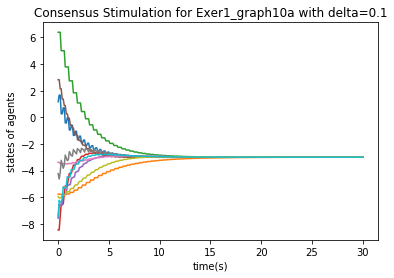

In [20]:

T_10a,t_10a,X_10a=switch_consensus(L_10a,edges_10a,x10a,delta=0.1)
plt.title('Consensus Stimulation for Exer1_graph10a with delta=0.1')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t_10a,X_10a)

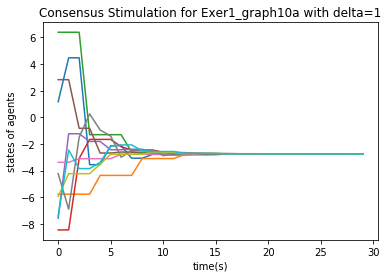

In [21]:
T1_10a,t1_10a,X1_10a=switch_consensus(L_10a,edges_10a,x10a,delta=1)
plt.title('Consensus Stimulation for Exer1_graph10a with delta=1')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t1_10a[0:30],X1_10a[0:30,:])

Both figures show that algorithm fails to bring a consensus, as we have shown before there is no rooted-out branching.

In [22]:
random.seed(2)
x10b=np.random.default_rng().uniform(-10,10,10)

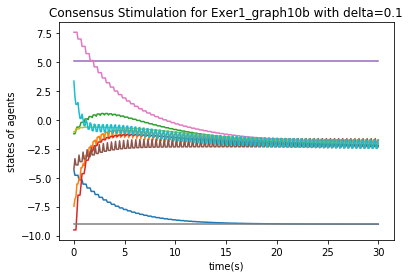

In [23]:

T_10b,t_10b,X_10b=switch_consensus(L_10b,edges_10b,x10b)
plt.title('Consensus Stimulation for Exer1_graph10b with delta=0.1')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t_10b,X_10b)


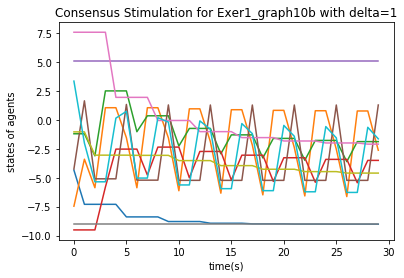

In [24]:
T1_10b,t1_10b,X1_10b=switch_consensus(L_10b,edges_10b,x10b,delta=1)
plt.title('Consensus Stimulation for Exer1_graph10b with delta=1')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t1_10b[0:30],X1_10b[0:30,:])

Both figures show that algorithm does converge to the consensus and in order to make a comparison, we only look at first 6 seconds of both cases. Apparently, when time interval is shorter, convegence tends to be smoother. 

In [25]:
random.seed(3)
x100a=np.random.default_rng().uniform(-10,10,100)

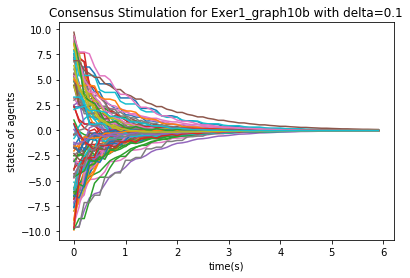

In [26]:

T_100a,t_100a,X_100a=switch_consensus(L_100a,edges_100a,x100a)
plt.title('Consensus Stimulation for Exer1_graph10b with delta=0.1')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t_100a[0:60],X_100a[0:60,:])

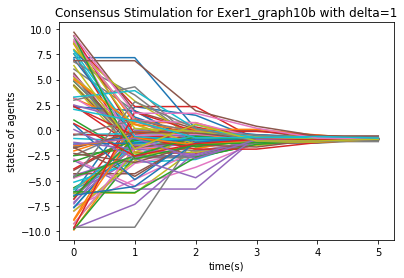

In [27]:
T1_100a,t1_100a,X1_100a=switch_consensus(L_100a,edges_100a,x100a,delta=1)
plt.title('Consensus Stimulation for Exer1_graph10b with delta=1')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t1_100a[0:6],X1_100a[0:6])

Both figures show that the algorithm fails to bring a consensus,since there is no rooted-out branching. 

In [71]:

x100b=np.random.default_rng().uniform(-10,10,100)

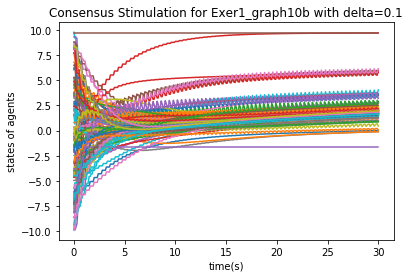

In [72]:
T_100b,t_100b,X_100b=switch_consensus(L_100b,edges_100b,x100b)
plt.title('Consensus Stimulation for Exer1_graph10b with delta=0.1')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t_100b,X_100b)

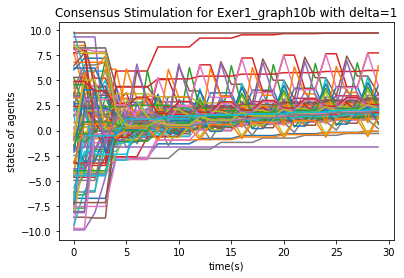

In [73]:
T1_100b,t1_100b,X1_100b=switch_consensus(L_100b,edges_100b,x100b,delta=1)
plt.title('Consensus Stimulation for Exer1_graph10b with delta=1')
plt.xlabel('time(s)')
plt.ylabel('states of agents')
plt.plot(t1_100b[0:30],X1_100b[0:30,:])